## 08 - Mathematical morphology


#### Part 2 - implementing a hit-or-miss transform


In [1]:
import imageio
import numpy as np
from skimage import morphology
import matplotlib.pyplot as plt

---

#### Hit-or-miss transform

It is a type of shape-detection / pattern matching algorithm

* an erosion can be seen as a *hit* or a matching
* but only erosion cannot guarantee that the hit is a disjunct object
* so we use local background information to do that so

The hit-or-miss of an image A with a structuring element S is:

$$(A \ominus S) \cap ( A^C \ominus (W-S) )$$

where $A^C$ is complement of $A$ and $W$ is a window that can be obtained by the dilation of $S$

In [2]:
S = np.zeros([7,7])
S[3, 1:6] = 1
S[1:6, 2:5] = 1
S

array([[0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0.]])

In [3]:
W = morphology.dilation(S, morphology.diamond(1))
W

array([[0., 0., 1., 1., 1., 0., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 1., 1., 1., 1., 1., 0.],
       [0., 0., 1., 1., 1., 0., 0.]])

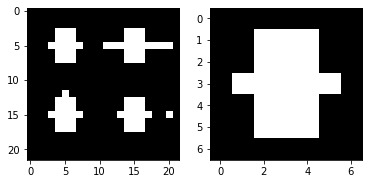

In [4]:
A = imageio.imread("images/hit2.png")
plt.subplot(121); plt.imshow(A, cmap="gray")
plt.subplot(122); plt.imshow(S, cmap="gray")

$$(A \ominus S) \cap ( A^C \ominus (W-S) )$$

Text(0.5, 1.0, 'A erosion S')

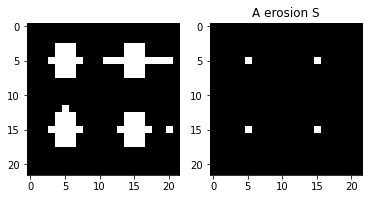

In [5]:
AerosionS = morphology.erosion(A, S).astype(np.uint8)
plt.subplot(121); plt.imshow(A, cmap="gray")
plt.subplot(122); plt.imshow(AerosionS, cmap="gray"); plt.title("A erosion S")

Text(0.5, 1.0, 'W-S')

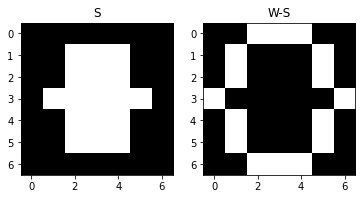

In [6]:
WminusS = W-S
plt.subplot(121); plt.imshow(S, cmap="gray"); plt.title("S")
plt.subplot(122); plt.imshow(W-S, cmap="gray"); plt.title("W-S")

Text(0.5, 1.0, 'A complement')

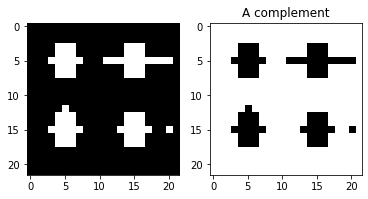

In [7]:
Acomp = (A-1).astype(np.uint8)
plt.subplot(121); plt.imshow(A, cmap="gray")
plt.subplot(122); plt.imshow(Acomp, cmap="gray"); plt.title("A complement")

Text(0.5, 1.0, 'A comp erosion')

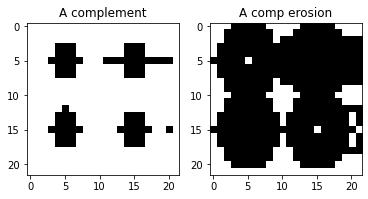

In [8]:
Acomp_erosion_WminusS = morphology.erosion(Acomp, WminusS).astype(np.uint8)
plt.subplot(121); plt.imshow(Acomp, cmap="gray"); plt.title("A complement")
plt.subplot(122); plt.imshow(Acomp_erosion_WminusS, cmap="gray"); plt.title("A comp erosion")

Putting everything together
* we have to take care to convert the matrices into binary before applying `bitwise_and`

(array([ 5,  5, 15, 15]), array([ 5, 15,  5, 15]))
(array([], dtype=int64), array([], dtype=int64))


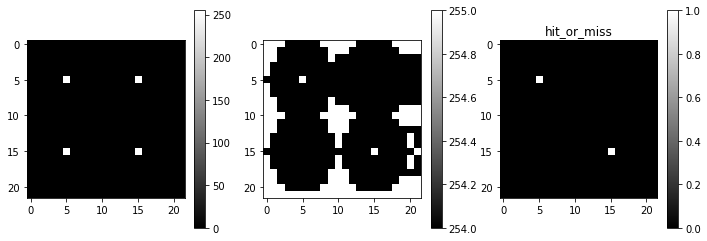

In [9]:
A_hit_S = np.bitwise_and(AerosionS==255, Acomp_erosion_WminusS==255).astype(np.uint8)

fig = plt.figure(figsize=(12,4))
plt.subplot(131); plt.imshow(AerosionS, cmap="gray"); plt.colorbar()
plt.subplot(132); plt.imshow(Acomp_erosion_WminusS, cmap="gray"); plt.colorbar()
plt.subplot(133); plt.imshow(A_hit_S, cmap="gray"); plt.title("hit_or_miss"); plt.colorbar()

print(np.where(AerosionS == 255))

print(np.where(A_hit_S == 255))